<a href="https://colab.research.google.com/github/kslim1025/TF_FashionMNIST/blob/master/Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60000 10000
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.003

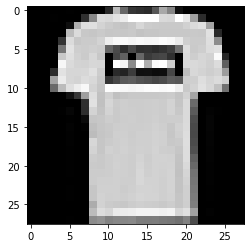

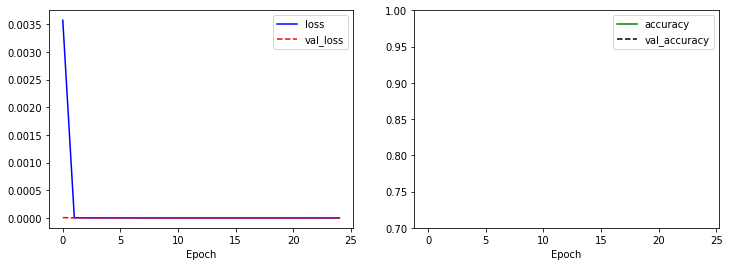

313/313 [==============================] - 1s 2ms/step - loss: 27703.5000 - accuracy: 0.1000
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
#MNIST 문자열 분석으로 유명한 데이터셋이 패션에 관한 데이터 세트를 만듬 그게 FashionMINIST 데이터셋이다.
#데이터 이미지가 0에서 255까지 값을 가지는 28x28이미지라는 것을 확인가능
#정답이 되는 라벨을 확인하기 위해 print를 붙여서  확인
#외부 데이터를 이용한 정제과정
#ctrl+enter를 사용한 런타임가능
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

# 넘파이는 수학과 과학 연산에 특화된 파이썬 모듈로 딥러닝에서도 유용하게 사용된다.

import numpy as np;
import tensorflow as tf;
import pandas as pd;
import matplotlib.pyplot as plt;

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data();

print(len(train_X),len(test_X))

plt.imshow(train_X[1], cmap='gray')

#정규화
train_X = train_X / 255.0;
train_Y = train_Y / 255.0;

print(train_X[0]);

#학습 모델을 정의하고 실제 학습하는것이 목표
#Flatten이라는 레이어는 다차원레이어를 1차원으로 정렬하는 역할을 합니다
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
               optimizer = tf.keras.optimizers.Adam(),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy']
)

model.summary()
#분류모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25);
#분류 모델의 학습 결과 시각화
plt.figure(figsize=(12, 4));
plt.subplot(1, 2, 1);
plt.plot(history.history['loss'], '-b', label='loss');
plt.plot(history.history['val_loss'], '--r', label='val_loss');
plt.xlabel('Epoch');
plt.legend();

plt.subplot(1, 2, 2);
plt.plot(history.history['accuracy'], '-g', label='accuracy');
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy');
plt.xlabel('Epoch');
plt.ylim(0.7, 1);
plt.legend();

plt.show();

#분류모델평가
model.evaluate(test_X, test_Y);

#Conv2D 레이어 생성 코드
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3),strides=(2,2), padding='valid', filters=16);

#MaxPool2D 레이어 생성 코드
#사각형 안에 최댓값만 남기는 연산을 하게 됩니다.
#pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides(2,2));

#드롭아웃레이어 생성 코드
pool1 = tf.keras.layers.Dropout(rate=0.3);
#데이터세트 불러오기 및 정규화
fashion_mnist = tf.keras.datasets.fashion_mnist;
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data();

train_X = train_X / 255.0;
test_X = test_X / 255.0;

#reshape 이전, 흑백이기 때문에 1로 지정 RGB이면 3
print(train_X.shape, test_X.shape);

train_X = train_X.reshape(-1, 28, 28, 1);
test_X = test_X.reshape(-1, 28, 28, 1);

#reshape 이후
print(train_X.shape, test_X.shape);

